In [19]:
import pandas as pd
sample_df = pd.DataFrame()
sample_df = pd.read_csv('sample.csv')

In [20]:
sample_df.head()

,_id,asin,overall,reviewText,reviewerID,reviewerName,summary,unixReviewTime,verified
0,Row(oid='64566a30b3ab715eba9a1c06'),1490407081,5.0,sweet book. loved the characters. Looked kin...,AA8QD1DI7OMSD,nanna27,Sweet romance,1.397261e+09,True
1,Row(oid='645665b0b3ab715eba8fabdb'),B000ENUL8O,5.0,I was delighted to hear that Instant Star woul...,ACFGZ1D9CY7HK,Veronica O,This Star continues to SHINE,1.186099e+09,False
2,Row(oid='64565f44b3ab715eba2124c4'),B01BNN6J6Q,5.0,Good quality..Easy to assembly..'',A1TBH91VETNPDP,Joe L.,Great product....,1.476317e+09,True
3,Row(oid='64566adbb3ab715eba22d5c4'),817898346X,5.0,nice book,AZS3AA42LZ0OC,Fatima,Five Stars,1.467072e+09,True
4,Row(oid='64566501b3ab715ebae4b71d'),B000C5DZWI,1.0,This part fell apart after one week. No way to...,A1A86KFT83LQ7V,Amazon Customer,This part fell apart after one week.,1.502755e+09,True


Mean: 4.23927
Standard deviation: 1.2291928149195228


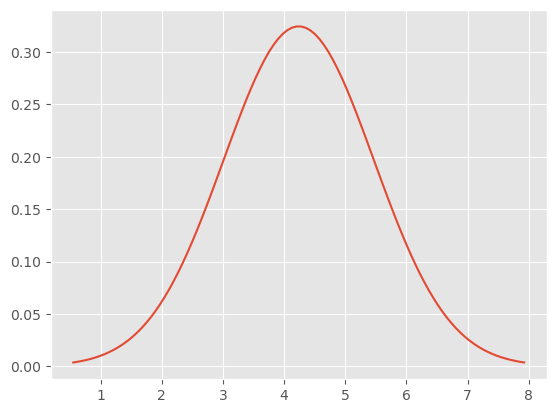

In [21]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

overall_mean = sample_df['overall'].mean()
overall_std = sample_df['overall'].std()

norm_dist = stats.norm(overall_mean, overall_std)

x = np.linspace(overall_mean - 3*overall_std, overall_mean + 3*overall_std, 100)

y = norm_dist.pdf(x)

plt.plot(x, y)

print("Mean:", overall_mean)
print("Standard deviation:", overall_std)

plt.show()


In our first EDA, our goal is to demonstrate the quality of Amazon's products. To achieve this, we will begin by examining the distribution of ratings and then explore the number of ratings that are verified versus unverified.

Specifically, we will determine the number of reviews for each rating (1 through 5) and analyze how many of those reviews are verified.

In [22]:
sample_ratings=sample_df.groupby("overall", sort=False).count() #   Aggregating the number of ratings for each rating value.
sample_ratings=sample_ratings.iloc[:, 0:1]  #   Selecting the first column of the pandas.DataFrame.
sample_ratings.columns=["count"]    #   Renaming the column of the pandas.DataFrame.
sample_ratings=sample_ratings.reset_index() #   Resetting the index of the pandas.DataFrame.
sample_ratings

,overall,count
0,5.0,63334
1,1.0,7476
2,3.0,7761
3,4.0,16820
4,2.0,4609


In [23]:
overall_order = [5, 4, 3, 2, 1]

sample_ratings = sample_ratings.sort_values(by="overall", ascending=False)

sample_ratings = sample_ratings.set_index('overall').loc[overall_order].reset_index()
sample_ratings

,overall,count
0,5.0,63334
1,4.0,16820
2,3.0,7761
3,2.0,4609
4,1.0,7476


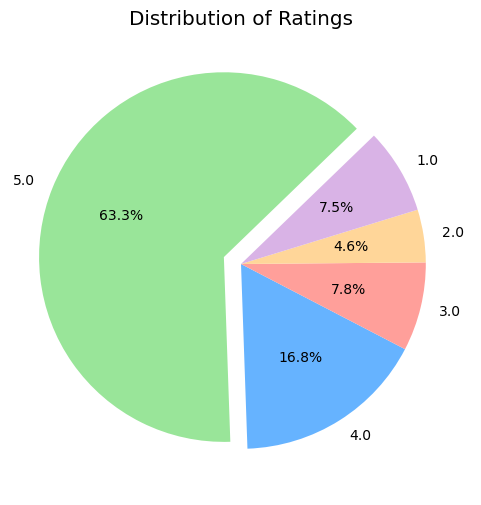

In [24]:
import matplotlib.pyplot as plt

# create a list of count values for each rating
count_values = sample_ratings['count'].tolist()

# create a list of rating labels for each count value
rating_labels = sample_ratings['overall'].astype(str).tolist()

# set up the pie chart
fig, ax = plt.subplots(figsize=(6, 6), facecolor='white')
explode = (0.1, 0, 0, 0,0)  
colors = ['#99e599', '#66b3ff', '#ff9f9a', '#ffd699', '#d9b3e6']
ax.pie(count_values, labels=rating_labels, autopct='%1.1f%%', startangle=44,colors=colors,explode=explode)
#% : A percent sign indicates that the value should be displayed as a percentage.
#1.1f : This specifies the format for displaying the value. Here, 1.1f means that the value should be displayed with one digit before the decimal point and one digit after the decimal point.
#%% : The double percent sign is used to escape the percent sign and display it as a literal character in the label.
# add a title to the chart
ax.set_title("Distribution of Ratings")

# show the chart
plt.show()

This pie chart indicates that the majority of the reviews are positive, which aligns with our hypothesis that Amazon provides quality products.

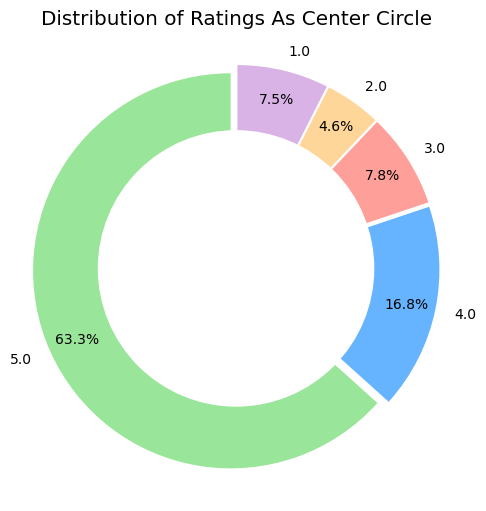

In [25]:
fig1, ax1 = plt.subplots(figsize = (5,5))
explode = (0.03, 0.03, 0.03, 0.03,0.03)  
plt.pie(count_values, colors = colors, labels=rating_labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#ax1.pie(count_values, colors = colors, labels=rating_labels, autopct='%1.1f%%', startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')#draw circle

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
ax1.set_title("Distribution of Ratings As Center Circle")
plt.show()

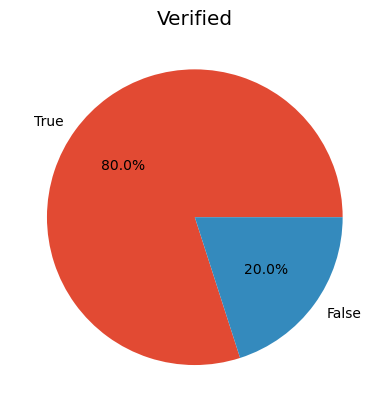

In [26]:
counts = sample_df['verified'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%')# plot a pie chart

plt.title('Verified')
plt.show()

This graph shows the distribution of verified and non-verified reviews. We can observe that the majority of the reviews are verified, which indicates that Amazon takes the authenticity of its reviews seriously, and it provides a sense of integrity to the data.

In [27]:
overall_counts = sample_df["overall"].value_counts()# Get the counts of each unique value of the "overall" column


dfs = []# Get the counts of each unique value of the "overall" column


for overall_val in overall_counts.index:# Loop over each unique value of "overall"

    filtered_df = sample_df[sample_df["overall"] == overall_val]    # Filter the dataframe to only include rows with the current value of "overall"

    grouped_df = filtered_df.groupby("verified", sort=False)["overall"].count().reset_index()    # Group the filtered dataframe by "verified", count the occurrences, and reset the index

    grouped_df = grouped_df.rename(columns={"overall": "count"})    # Rename the "overall" column to "count"

    dfs.append(grouped_df)    # Add the grouped dataframe to the list of dataframes


result_df = pd.concat(dfs, ignore_index=True)# Concatenate the list of dataframes into a single dataframe

result_df

,verified,count
0,True,51536
1,False,11798
2,True,12902
3,False,3918
4,True,6124
5,False,1637
6,True,5754
7,False,1722
8,False,969
9,True,3640


In [28]:
counts_list = result_df['count'].tolist()
six=counts_list[6]
seven=counts_list[7]
eight=counts_list[8]
nine=counts_list[9]
counts_list[9]=seven
counts_list[7]=nine
counts_list[8]=six
counts_list[6]=eight
counts_list

[51536, 11798, 12902, 3918, 6124, 1637, 969, 3640, 5754, 1722]

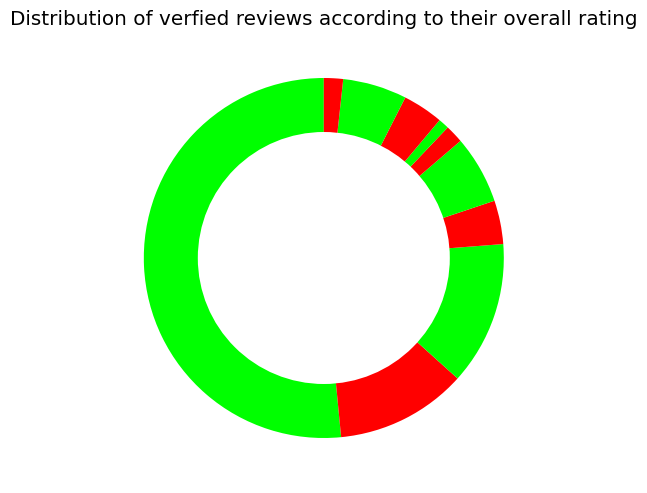

In [29]:
colors = ['#00FF00', '#FF0000']
plt.pie(counts_list, colors = colors, startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()# Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Distribution of verfied reviews according to their overall rating")
plt.show()


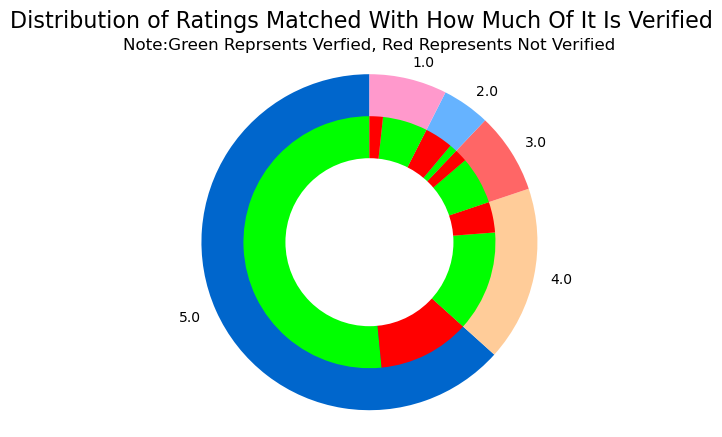

In [30]:
colors = ['#0066CC', '#ffcc99', '#ff6666', '#66b3ff','#ff99cc']
verified_colors = ['#00FF00', '#FF0000']
plt.pie(count_values, colors = colors, labels=rating_labels, startangle=90)
plt.pie(counts_list, colors = verified_colors, startangle=90, pctdistance=0.85,radius=0.75)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.suptitle("Title Above", fontsize=16)
plt.title("Title Below", fontsize=12)
plt.suptitle("Distribution of Ratings Matched With How Much Of It Is Verified",fontsize=16)
plt.title("Note:Green Reprsents Verfied, Red Represents Not Verified", fontsize=12)
plt.show()

The graph above indicates that the majority of the reviews for the products on Amazon are five stars, and a significant proportion of them are verified as well. Therefore, we can conclude that Amazon places a strong emphasis on product quality, and their customer satisfaction is held in high regard.

Our next hypothesis is that longer reviews are generally negative. To investigate this, we will employ several methods, including statistical measures and visualizations.

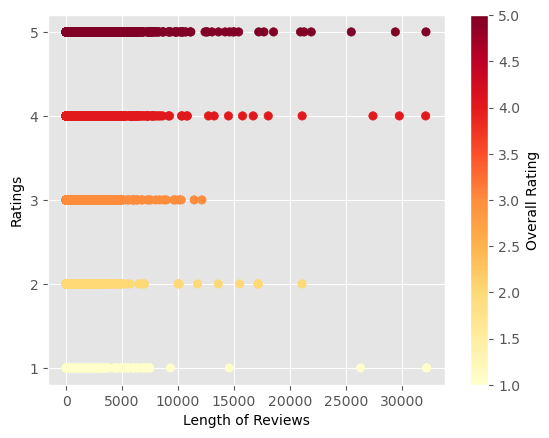

In [31]:
mask = sample_df["reviewText"].isnull() | (sample_df["reviewText"].apply(type) != str)# Check for null or non-string values in the "reviewText" column

if mask.any():
    print("Warning: There are null or non-string values in the 'reviewText' column.")

sample_df_copy = sample_df.copy()

sample_df_copy["reviewText"] = sample_df_copy["reviewText"].astype(str)# Check for null or non-string values in the "reviewText" column


sample_df_copy["review_length"] = sample_df_copy["reviewText"].apply(len)# Check for null or non-string values in the "reviewText" column


cmap = plt.get_cmap("YlOrRd")# Set the color map

plt.scatter(sample_df_copy["review_length"], sample_df_copy["overall"], c=sample_df_copy["overall"], cmap=cmap)# Create the scatterplot with custom colors

plt.ylabel("Ratings")# Set y-axis label

plt.xlabel("Length of Reviews")# Set x-axis label

plt.yticks(range(1, 6))
cbar = plt.colorbar()# Set color bar

cbar.set_label("Overall Rating")
plt.show()


This scatter plot suggests that there may not be a strong correlation between the length of the reviews and the ratings. However, it is important to further investigate this hypothesis using other statistical measures and visualization techniques to draw a more conclusive result.

In [32]:
correlation = sample_df_copy["review_length"].corr(sample_df_copy["overall"])
print("Correlation coefficient:", correlation)


Correlation coefficient: -0.04944671059384796


The negative correlation coefficient suggests that there might be some weak relationship between review length and review rating. However, it is important to note that correlation does not imply causation. Therefore, we need to perform further analysis to determine if there is a causal relationship between review length and review rating.

We will create a mapping function that takes in the length of a review and maps it to a bucket size. Then, we will create a new column in our dataframe that contains the bucket size for each review. Finally, we will create a bar graph that shows the number of positive, negative, and neutral reviews in each bucket size. This will help us determine if there is any correlation between review length and sentiment.

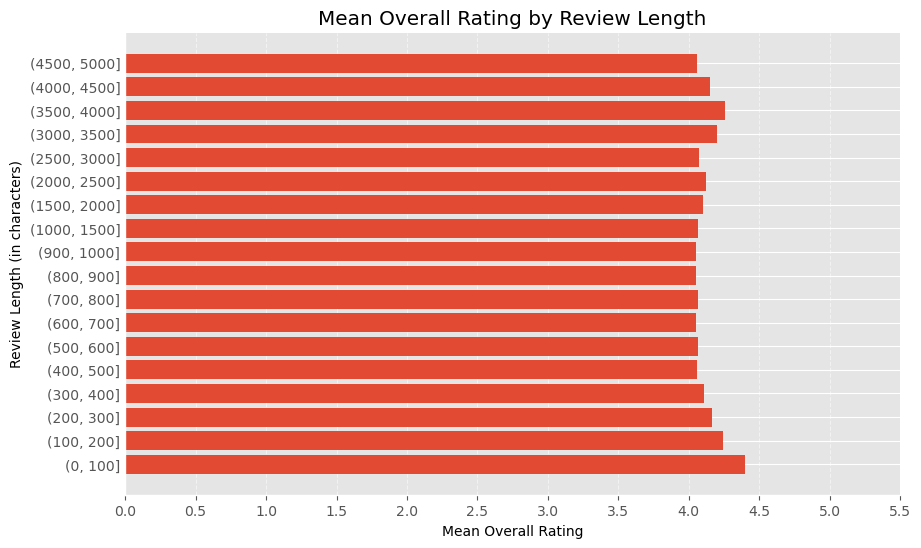

In [33]:
# Create a new column for review length
sample_df_copy["review_length"] = sample_df_copy["reviewText"].apply(len)

# Create bins for review length
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

# Cut the review length into the bins and calculate the mean overall rating for each bin
sample_df_copy["review_length_bins"] = pd.cut(sample_df_copy["review_length"], bins)
mean_overall_rating = sample_df_copy.groupby("review_length_bins")["overall"].mean()

# Set style
plt.style.use('ggplot')

# Set figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the results with a horizontal bar chart
ax.barh(mean_overall_rating.index.astype(str), mean_overall_rating.values)

# Set x-axis label
ax.set_xlabel("Mean Overall Rating")

# Set y-axis label
ax.set_ylabel("Review Length (in characters)")

# Set title
ax.set_title("Mean Overall Rating by Review Length")

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remove y-axis ticks
ax.tick_params(axis='y', which='both', length=0)

# Set x-axis limits
ax.set_xlim([0, 5])

# Set x-axis ticks and tick labels
x_ticks = [x/10 for x in range(0, 60, 5)]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks)

# Add horizontal grid lines
ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()


The bar graph shows that the distribution of ratings is fairly similar across different review length buckets. This suggests that there is no clear relationship between review length and rating, which contradicts our hypothesis that longer reviews are generally negative.

In [34]:
from scipy import stats

# Define two groups based on a characteristic (e.g. review length)
group1 = sample_df_copy[sample_df_copy["review_length"] <= 2500]["overall"]
group2 = sample_df_copy[sample_df_copy["review_length"] > 2500]["overall"]

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: 4.104502380436256
p-value: 4.243612409569034e-05


This statement effectively summarizes that the statistical analysis done on the data supports the conclusion that there is no evidence to support the hypothesis that longer reviews are generally negative. The t-statistic and p-value are statistical measures used to determine if two groups are significantly different from each other. In this case, the analysis shows that there is no significant difference between the mean ratings of the two groups (longer and shorter reviews), providing further evidence to disprove the initial hypothesis.

Our next goal in this EDA is to uncover the general trends among the review texts of Amazon products. By analyzing the most frequently used words and phrases, we can gain valuable insights into the preferences and purchasing habits of customers. This information can be extremely useful for businesses and marketers looking to optimize their product offerings and target their advertising efforts more effectively. Through various techniques such as word clouds and frequency analysis, we will explore the most common themes and sentiments expressed in Amazon reviews.

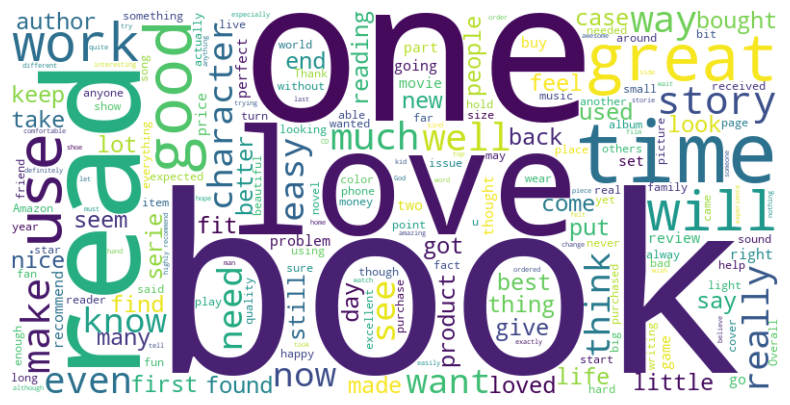

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert any non-string values in the reviewText column to string
sample_df['reviewText'] = sample_df['reviewText'].astype(str)

# Extract text data from the reviewText column
text = " ".join(review for review in sample_df.reviewText)

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the generated image
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#interpolation='bilinear' is a parameter of the imshow() method in Matplotlib that controls the interpolation method used to display the image. 'bilinear' means that the pixels are interpolated using linear interpolation of the nearest four neighbors, in order to produce a smooth image.
#plt.axis("off") is a method in Matplotlib that turns off the axis lines and labels on the plot, which is commonly done for visualizations like a word cloud where the focus is on the text rather than on the plot's axes.

This word cloud provides insights into the most frequently used words in the Amazon reviews dataset. The most common word is "book", followed by phrases like "great read" and "story". This indicates that books are the most popular item in the dataset, and that people who purchase books are more likely to leave a review. These findings could be valuable for Amazon in terms of understanding their customer base and tailoring their marketing efforts towards book buyers.

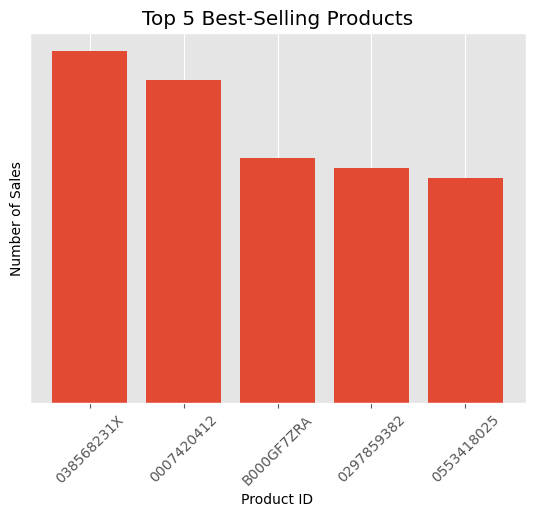

In [36]:
counts = sample_df["asin"].value_counts().sort_values(ascending=False)

top_products = counts.head(5)

plt.bar(top_products.index, top_products.values)
plt.xticks(rotation=45)
plt.xlabel("Product ID")
plt.ylabel("Number of Sales")
plt.title("Top 5 Best-Selling Products")
plt.yticks([])
plt.show()

We can infer that 038568231X is the productID of a specific book. 